In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_q1_data
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,8

In [3]:
X_train, X_test, y_train, y_test, le = get_q1_data()
print("%d training samples, %d test samples"%(X_train.shape[0], X_test.shape[0]))
print("classes:", le.classes_)
print("The first 10 training samples are (with bias):")
print(X_train[:10])

70 training samples, 30 test samples
('classes:', array(['Iris-versicolor', 'Iris-virginica'], dtype='|S20'))
The first 10 training samples are (with bias):
[[1.  5.6 3.  4.1 1.3]
 [1.  5.5 2.5 4.  1.3]
 [1.  5.5 2.6 4.4 1.2]
 [1.  6.1 3.  4.6 1.4]
 [1.  5.8 2.6 4.  1.2]
 [1.  5.  2.3 3.3 1. ]
 [1.  5.6 2.7 4.2 1.3]
 [1.  5.7 3.  4.2 1.2]
 [1.  5.7 2.9 4.2 1.3]
 [1.  6.2 2.9 4.3 1.3]]


### 1. Implement sigmoid function
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}} \\
\end{align}
<img src="Figures/logistic.png">

In [4]:
def sigmoid(x):
    ### TODO: Fill this function with your implementation of sigmoid function ####
    exp = np.exp(-x)
    return 1./(1.+exp)

def sigmoid_(x):
    return x * (1 - x)

### 2. Implement cross entropy
For binary classification for all samples with the output vector o and target label t $\in \{0, 1\}$:
\begin{align}
L(o, t) & = - \sum_{i=1}^n(t^{(i)}log(o^{(i)}) + (1-t^{i})log(1-o^{i})) \\
\end{align}

In [5]:
def crossentropy(o,t):
    ### o is the output, t is the target.
    ### TODO: Fill this function with your implementation of crossentropy function for all samples ####
    L = np.sum(np.multiply(t,np.log(o))) + np.sum(np.multiply((1.-t),np.log(1.-o)))
    return -L

### 3. Initialize weights
For weight initialization, please refer to http://cs231n.github.io/neural-networks-2/#init.

Here we are building a feed forward neural network with 2 hidden units as shown below. 
<img src="Figures/nn.png">

In [6]:
def xavier_init(n_in, n_out):
    w = np.random.normal(0, 2./(n_in + n_out), size=(n_in, n_out))
    return w

In [42]:
J = 2 # number of hidden units
### TODO: Fill the information for weight initialization ###
n_inp = X_train.shape[1]
n_hid = J
n_out = 1
w1 = xavier_init(n_inp, n_hid) # initialize weights with calibration between input and hidden layer.
w2 = xavier_init(n_hid, n_out) # initialize weights with calibration between hidden and output layer.
n_iter = 10000 # can be modified
alpha = 0.001 # can be modified
train_err = []
test_err = []
dw1_ = []
train_loss = []

In [43]:
def get_err(pred, gt, thresh=0.5):
    pred[pred>thresh] = 1.
    pred[pred<=thresh] = 0.
    return abs(gt-pred).sum()/gt.shape[0]

### 4. Implement gradient descent for n iterations.
Implement the update dw1 and dw2 based on your derivations for \begin{align}
\frac{\delta L}{\delta w_2}, 
\frac{\delta L}{\delta w_1}
\end{align}

In [44]:
### TODO: Fill the blanks below for gradient descent ###
iters = []
for n in range(n_iter):
    h = sigmoid(X_train.dot(w1))
    z = sigmoid(h.dot(w2))
    
    # backward computation to calculate dw1 and dw2
    E = y_train - z
    L = crossentropy(z, y_train)
    
    dz = E*sigmoid_(z)
    dw2 = h.T.dot(dz)
    
    dh = dz.dot(w2.T) * sigmoid_(h)
    dw1 = X_train.T.dot(dh)
    
    # weight updating
    w1 = w1 + alpha*dw1
    w2 = w2 + alpha*dw2

    # training error
    err = get_err(z, y_train)
    train_err.append(err) # calculate the error and append to train_err
    
    # training loss
    train_loss.append(L) # use your crossentropy to calculate the loss
    
    # test error
    h = sigmoid(X_test.dot(w1))
    z = sigmoid(h.dot(w2))
    err = get_err(z, y_test)
    test_err.append(err)
    
    iters.append(n)    
    if n>2 and test_err[-1]>test_err[-2]:
        break
    
    if n%100==0:
        print(n, train_err[-1], test_err[-1])


(0, 0.5, 0.5)
(100, 0.5, 0.5)
(200, 0.5, 0.5)
(300, 0.2857142857142857, 0.26666666666666666)
(400, 0.18571428571428572, 0.16666666666666666)
(500, 0.12857142857142856, 0.1)
(600, 0.11428571428571428, 0.03333333333333333)
(700, 0.12857142857142856, 0.03333333333333333)
(800, 0.12857142857142856, 0.03333333333333333)
(900, 0.14285714285714285, 0.03333333333333333)
(1000, 0.14285714285714285, 0.03333333333333333)
(1100, 0.12857142857142856, 0.03333333333333333)
(1200, 0.12857142857142856, 0.03333333333333333)
(1300, 0.11428571428571428, 0.03333333333333333)
(1400, 0.11428571428571428, 0.0)
(1500, 0.11428571428571428, 0.0)
(1600, 0.11428571428571428, 0.0)
(1700, 0.11428571428571428, 0.0)
(1800, 0.08571428571428572, 0.0)


### 5. Print training loss vs number of iterations

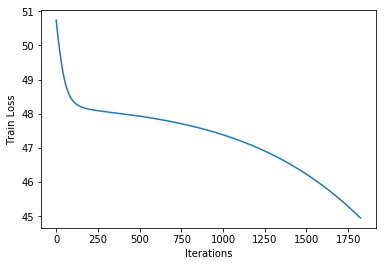

In [47]:
plt.plot(iters, train_loss)
#plt.plot(range(0,n_iter,100), train_loss[::100])
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
#plt.ylim(0., 1.)
plt.show()

### 6. Print training error and test error

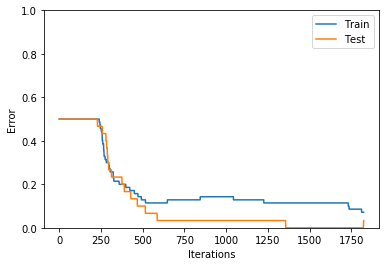

In [48]:
plt.plot(iters, train_err)
plt.plot(iters, test_err)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.ylim(0., 1.)
plt.show()